# Unsupervised Learning - Week 4 Assignment

This section covers unsupervised learning with a practical focus, avoiding deep theoretical discussions. The emphasis is on applying these methods in EO scenarios, particularly for classification tasks, where they excel at identifying patterns in unlabeled data.

Key topics:

* Detecting structure and relationships in datasets without predefined categories.
* Primary tasks:
  * Classifying sea ice and leads using Sentinel-2 optical data.
  *  Classifying sea ice and leads using Sentinel-3 altimetry data.

## Introduction to K-means Clustering

K-means is an unsupervised learning algorithm used to partition data into k predefined clusters based on feature similarity. It works by iteratively assigning data points to the nearest centroid and updating centroids until minimal variation within clusters is achieved.

### Why K-means?

* Suitable for datasets with unknown structure (ideal for exploratory analysis).
* Simple and scalable for large datasets.

### Key Components:

* Choosing k: The number of clusters must be predefined.
* Centroid Initialization: Initial placement affects results.
* Assignment Step: Data points assigned to nearest centroid (using Euclidean distance).
* Update Step: Centroids recalculated based on assigned points.

### Basic Code Implementation

Below, you'll find a basic implementation of the K-means clustering algorithm. This serves as a foundational understanding and a starting point for applying the algorithm to your specific data analysis tasks.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
pip install rasterio

In [8]:
pip install netCDF4

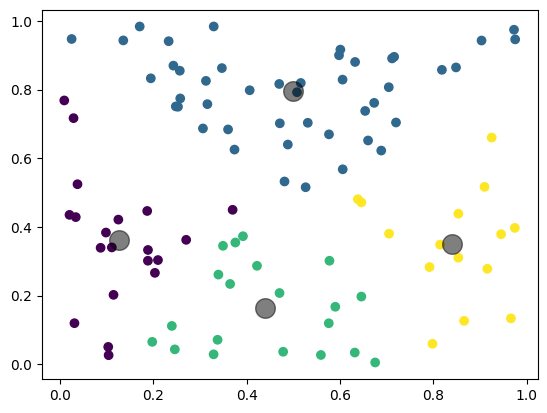

In [9]:
# Python code for K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# K-means model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


## Gaussian Mixture Models (GMM)

GMM is a probabilistic model that represents data as a mixture of multiple Gaussian distributions, each with its own mean and variance. It is used for clustering and density estimation, offering a more flexible alternative to K-means.

### Why GMM for Clustering?

* Soft Clustering: Assigns probabilities to data points for each cluster rather than hard assignments.
* Flexible Cluster Shapes: Allows clusters to have different sizes and orientations, adapting to complex data distributions.

### Key Components:

* Number of Components: Similar to k in K-means, defines the number of Gaussian distributions.
* Expectation-Maximization (EM) Algorithm: Iteratively refines cluster assignments and model parameters.
* Covariance Type: Defines cluster shape (e.g., spherical, elliptical).

### The EM Algorithm:

* Expectation Step (E-step): Computes the probability of each point belonging to each cluster.
* Maximization Step (M-step): Updates Gaussian parameters (mean, covariance, mixing coefficient) to maximize data likelihood.
* Repeats until convergence.


### Basic Code Implementation

Below, you'll find a basic implementation of the Gaussian Mixture Model. This should serve as an initial guide for understanding the model and applying it to your data analysis projects.


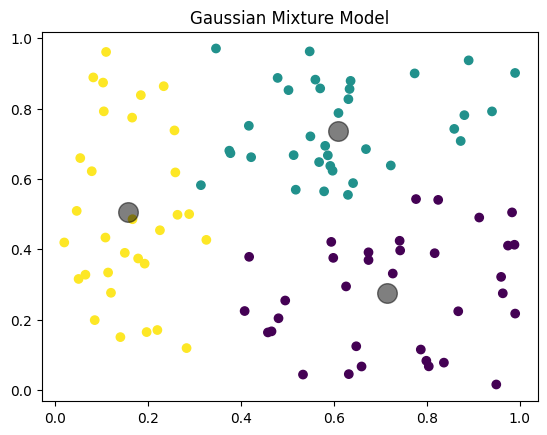

In [10]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# GMM model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_gmm = gmm.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis')
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Gaussian Mixture Model')
plt.show()


## Image Classification
Now, let's explore the application of these unsupervised methods to image classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-2 imagery.

### K-Means Implementation

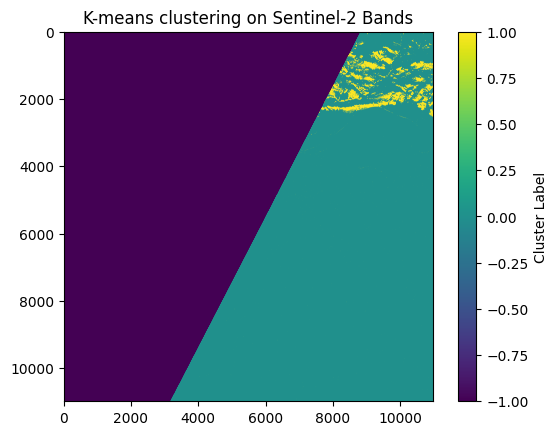

In [11]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

base_path = "/content/drive/MyDrive/GEOL0069_data/Week 4/Unsupervised Learning/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for K-means, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 1))

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('K-means clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()

del kmeans, labels, band_data, band_stack, valid_data_mask, X, labels_image


### GMM Implementation

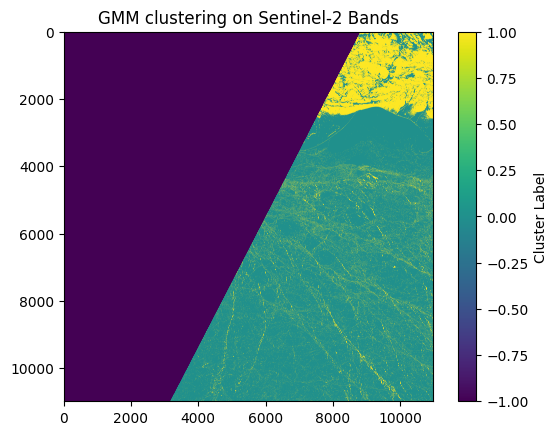

In [1]:
import rasterio
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Paths to the band images
base_path = "/content/drive/MyDrive/GEOL0069_data/Week 4/Unsupervised Learning/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for GMM, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 1))

# GMM clustering
gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = gmm.predict(X)

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place GMM labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('GMM clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()


## Altimetry Classification
Now, let's explore the application of these unsupervised methods to altimetry classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-3 altimetry dataset.

### Read in Functions Needed
Before delving into the modeling process, it's crucial to preprocess the data to ensure compatibility with our analytical models. This involves transforming the raw data into meaningful variables, such as peakniness and stack standard deviation (SSD), etc.

In [2]:
#
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
import glob
from matplotlib.patches import Polygon
import scipy.spatial as spatial
from scipy.spatial import KDTree
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster

#=========================================================================================================
#===================================  SUBFUNCTIONS  ======================================================
#=========================================================================================================

#*args and **kwargs allow you to pass an unspecified number of arguments to a function,
#so when writing the function definition, you do not need to know how many arguments will be passed to your function
#**kwargs allows you to pass keyworded variable length of arguments to a function.
#You should use **kwargs if you want to handle named arguments in a function.
#double star allows us to pass through keyword arguments (and any number of them).
def peakiness(waves, **kwargs):

    "finds peakiness of waveforms."

    #print("Beginning peakiness")
    # Kwargs are:
    #          wf_plots. specify a number n: wf_plots=n, to show the first n waveform plots. \

    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    import time

    print("Running peakiness function...")

    size=np.shape(waves)[0] #.shape property is a tuple of length .ndim containing the length of each dimensions
                            #Tuple of array dimensions.

    waves1=np.copy(waves)

    if waves1.ndim == 1: #number of array dimensions
        print('only one waveform in file')
        waves2=waves1.reshape(1,np.size(waves1)) #numpy.reshape(a, newshape, order='C'), a=array to be reshaped
        waves1=waves2

    # *args is used to send a non-keyworded variable length argument list to the function
    def by_row(waves, *args):
        "calculate peakiness for each waveform"
        maximum=np.nanmax(waves)
        if maximum > 0:

            maximum_bin=np.where(waves==maximum)
            #print(maximum_bin)
            maximum_bin=maximum_bin[0][0]
            waves_128=waves[maximum_bin-50:maximum_bin+78]

            waves=waves_128

            noise_floor=np.nanmean(waves[10:20])
            where_above_nf=np.where(waves > noise_floor)

            if np.shape(where_above_nf)[1] > 0:
                maximum=np.nanmax(waves[where_above_nf])
                total=np.sum(waves[where_above_nf])
                mean=np.nanmean(waves[where_above_nf])
                peaky=maximum/mean

            else:
                peaky = np.nan
                maximum = np.nan
                total = np.nan

        else:
            peaky = np.nan
            maximum = np.nan
            total = np.nan

        if 'maxs' in args:
            return maximum
        if 'totals' in args:
            return total
        if 'peaky' in args:
            return peaky

    peaky=np.apply_along_axis(by_row, 1, waves1, 'peaky') #numpy.apply_along_axis(func1d, axis, arr, *args, **kwargs)

    if 'wf_plots' in kwargs:
        maximums=np.apply_along_axis(by_row, 1, waves1, 'maxs')
        totals=np.apply_along_axis(by_row, 1, waves1, 'totals')

        for i in range(0,kwargs['wf_plots']):
            if i == 0:
                print("Plotting first "+str(kwargs['wf_plots'])+" waveforms")

            plt.plot(waves1[i,:])#, a, col[i],label=label[i])
            plt.axhline(maximums[i], color='green')
            plt.axvline(10, color='r')
            plt.axvline(19, color='r')
            plt.xlabel('Bin (of 256)')
            plt.ylabel('Power')
            plt.text(5,maximums[i],"maximum="+str(maximums[i]))
            plt.text(5,maximums[i]-2500,"total="+str(totals[i]))
            plt.text(5,maximums[i]-5000,"peakiness="+str(peaky[i]))
            plt.title('waveform '+str(i)+' of '+str(size)+'\n. Noise floor average taken between red lines.')
            plt.show()


    return peaky

#=========================================================================================================
#=========================================================================================================
#=========================================================================================================


def unpack_gpod(variable):

    from scipy.interpolate import interp1d

    time_1hz=SAR_data.variables['time_01'][:]
    time_20hz=SAR_data.variables['time_20_ku'][:]
    time_20hzC = SAR_data.variables['time_20_c'][:]

    out=(SAR_data.variables[variable][:]).astype(float)  # convert from integer array to float.

    #if ma.is_masked(dataset.variables[variable][:]) == True:
    #print(variable,'is masked. Removing mask and replacing masked values with nan')
    out=np.ma.filled(out, np.nan)

    if len(out)==len(time_1hz):

        print(variable,'is 1hz. Expanding to 20hz...')
        out = interp1d(time_1hz,out,fill_value="extrapolate")(time_20hz)

    if len(out)==len(time_20hzC):
        print(variable, 'is c band, expanding to 20hz ku band dimension')
        out = interp1d(time_20hzC,out,fill_value="extrapolate")(time_20hz)
    return out


#=========================================================================================================
#=========================================================================================================
#=========================================================================================================

def calculate_SSD(RIP):

    from scipy.optimize import curve_fit
    # from scipy import asarray as ar,exp
    from numpy import asarray as ar, exp

    do_plot='Off'

    def gaussian(x,a,x0,sigma):
            return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

    SSD=np.zeros(np.shape(RIP)[0])*np.nan
    x=np.arange(np.shape(RIP)[1])

    for i in range(np.shape(RIP)[0]):

        y=np.copy(RIP[i])
        y[(np.isnan(y)==True)]=0

        if 'popt' in locals():
            del(popt,pcov)

        SSD_calc=0.5*(np.sum(y**2)*np.sum(y**2)/np.sum(y**4))
        #print('SSD calculated from equation',SSD)

        #n = len(x)
        mean_est = sum(x * y) / sum(y)
        sigma_est = np.sqrt(sum(y * (x - mean_est)**2) / sum(y))
        #print('est. mean',mean,'est. sigma',sigma_est)

        try:
            popt,pcov = curve_fit(gaussian, x, y, p0=[max(y), mean_est, sigma_est],maxfev=10000)
        except RuntimeError as e:
            print("Gaussian SSD curve-fit error: "+str(e))
            #plt.plot(y)
            #plt.show()

        except TypeError as t:
            print("Gaussian SSD curve-fit error: "+str(t))

        if do_plot=='ON':

            plt.plot(x,y)
            plt.plot(x,gaussian(x,*popt),'ro:',label='fit')
            plt.axvline(popt[1])
            plt.axvspan(popt[1]-popt[2], popt[1]+popt[2], alpha=0.15, color='Navy')
            plt.show()

            print('popt',popt)
            print('curve fit SSD',popt[2])

        if 'popt' in locals():
            SSD[i]=abs(popt[2])


    return SSD


In [3]:
path = '/content/drive/MyDrive/GEOL0069_data/Week 4/Unsupervised Learning/'
SAR_file = 'S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3'
SAR_data = Dataset(path + SAR_file + '/enhanced_measurement.nc')

SAR_lat = unpack_gpod('lat_20_ku')
SAR_lon = unpack_gpod('lon_20_ku')
waves   = unpack_gpod('waveform_20_ku')
sig_0   = unpack_gpod('sig0_water_20_ku')
RIP     = unpack_gpod('rip_20_ku')
flag = unpack_gpod('surf_type_class_20_ku')

# Filter out bad data points using criteria (here, lat >= -99999)
find = np.where(SAR_lat >= -99999)
SAR_lat = SAR_lat[find]
SAR_lon = SAR_lon[find]
waves   = waves[find]
sig_0   = sig_0[find]
RIP     = RIP[find]

# Calculate additional features
PP = peakiness(waves)
SSD = calculate_SSD(RIP)

# Convert to numpy arrays (if not already)
sig_0_np = np.array(sig_0)
PP_np    = np.array(PP)
SSD_np   = np.array(SSD)

# Create data matrix
data = np.column_stack((sig_0_np, PP_np, SSD_np))

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

Running peakiness function...


<ipython-input-2-df8dce6d9cd2>:63: RuntimeWarning: Mean of empty slice
  noise_floor=np.nanmean(waves[10:20])


Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.


There are some NaN values in the dataset so one way to deal with this is to delete them.

In [4]:
# Remove any rows that contain NaN values
nan_count = np.isnan(data_normalized).sum()
print(f"Number of NaN values in the array: {nan_count}")

data_cleaned = data_normalized[~np.isnan(data_normalized).any(axis=1)]

mask = ~np.isnan(data_normalized).any(axis=1)
waves_cleaned = np.array(waves)[mask]
flag_cleaned = np.array(flag)[mask]

data_cleaned = data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)]
waves_cleaned = waves_cleaned[(flag_cleaned==1)|(flag_cleaned==2)]
flag_cleaned = flag_cleaned[(flag_cleaned==1)|(flag_cleaned==2)]


Number of NaN values in the array: 1283


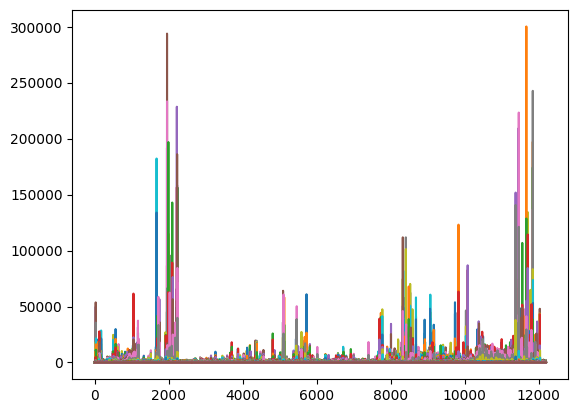

In [11]:
plt.plot(waves_cleaned)  # plot of all the echos
#plt.savefig("/content/drive/MyDrive/GEOL0069_data/Week 4/Unsupervised Learning/All_Echos.png",format='png', dpi=300)
plt.show()

### GMM Implementation

Now, let's proceed with running the GMM model as usual. Remember, you have the flexibility to substitute this with K-Means or any other preferred model.

In [5]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(data_cleaned)
clusters_gmm = gmm.predict(data_cleaned)

We can also inspect how many data points are there in each class of your clustering prediction.

In [12]:
unique, counts = np.unique(clusters_gmm, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Cluster counts:", class_counts)

Cluster counts: {0: 8880, 1: 3315}


We can plot the mean waveform of each class.

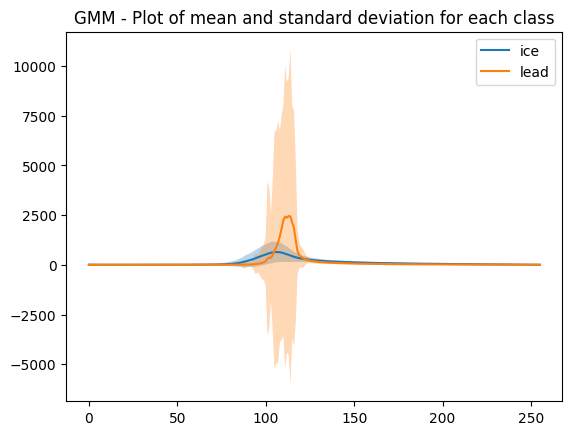

In [13]:
# mean and standard deviation for all echoes
mean_ice = np.mean(waves_cleaned[clusters_gmm==0],axis=0)
std_ice = np.std(waves_cleaned[clusters_gmm==0], axis=0)

plt.plot(mean_ice, label='ice')
plt.fill_between(range(len(mean_ice)), mean_ice - std_ice, mean_ice + std_ice, alpha=0.3)


mean_lead = np.mean(waves_cleaned[clusters_gmm==1],axis=0)
std_lead = np.std(waves_cleaned[clusters_gmm==1], axis=0)

plt.plot(mean_lead, label='lead')
plt.fill_between(range(len(mean_lead)), mean_lead - std_lead, mean_lead + std_lead, alpha=0.3)

plt.title('GMM - Plot of mean and standard deviation for each class')
plt.legend()
#plt.savefig("/content/drive/MyDrive/GEOL0069_data/Week 4/Unsupervised Learning/GMM_mean_SD_plot.png", format='png', dpi=300)


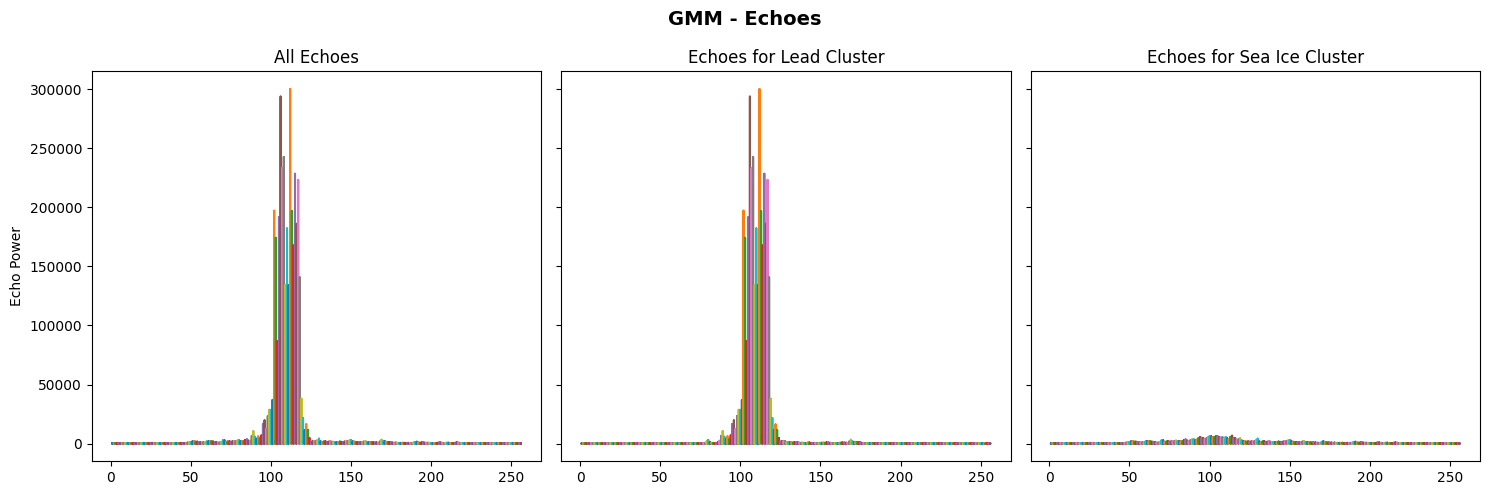

In [14]:
# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the figure title
fig.suptitle("GMM - Echoes", fontsize=14, fontweight='bold')

# Generate x values
x = np.stack([np.arange(1, waves_cleaned.shape[1] + 1)] * waves_cleaned.shape[0])
x_lead = np.stack([np.arange(1, waves_cleaned[clusters_gmm == 1].shape[1] + 1)] * waves_cleaned[clusters_gmm == 1].shape[0])
x_sea_ice = np.stack([np.arange(1, waves_cleaned[clusters_gmm == 0].shape[1] + 1)] * waves_cleaned[clusters_gmm == 0].shape[0])

# Plot all echoes
axes[0].plot(x, waves_cleaned)
axes[0].set_title("All Echoes")
axes[0].set_ylabel("Echo Power")

# Plot echoes for the lead cluster
axes[1].plot(x_lead, waves_cleaned[clusters_gmm == 1])
axes[1].set_title("Echoes for Lead Cluster")

# Plot echoes for the sea ice cluster
axes[2].plot(x_sea_ice, waves_cleaned[clusters_gmm == 0])
axes[2].set_title("Echoes for Sea Ice Cluster")

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
#plt.savefig("/content/drive/MyDrive/GEOL0069_data/Week 4/Unsupervised Learning/GMM_plot.png", format='png', dpi=300)
plt.show()


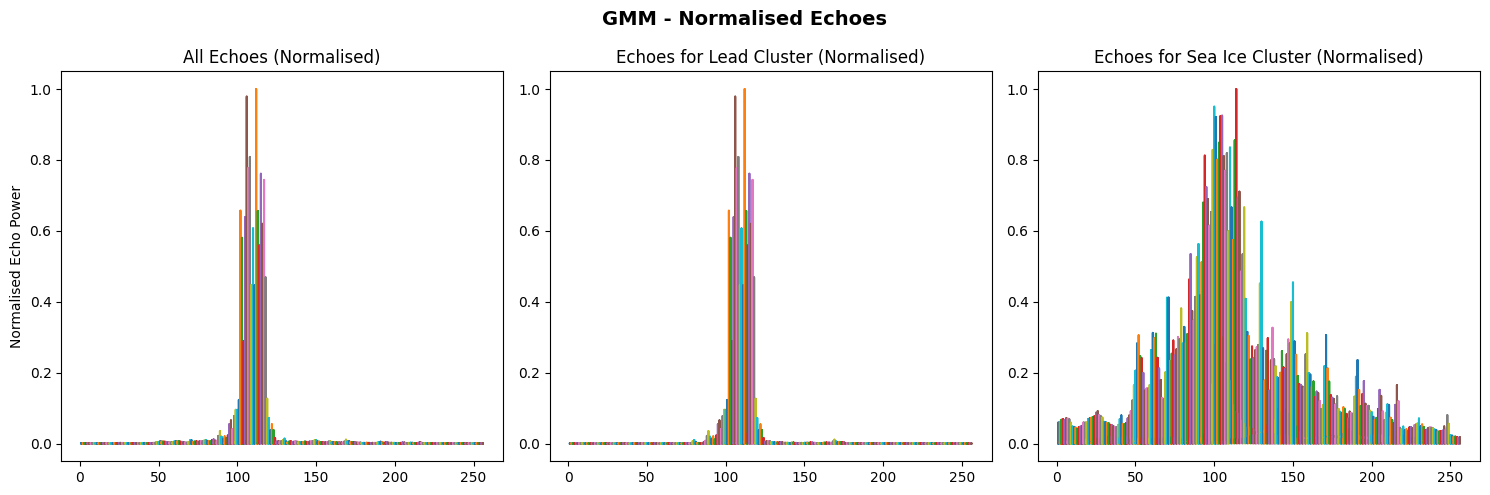

In [15]:
# Normalize function
def normalize(data):
    return data / np.max(data) if np.max(data) != 0 else data  # Avoid division by zero

# Normalize each dataset separately
waves_cleaned_norm = normalize(waves_cleaned)
waves_lead_norm = normalize(waves_cleaned[clusters_gmm == 1])
waves_sea_ice_norm = normalize(waves_cleaned[clusters_gmm == 0])

# Generate x values
x = np.stack([np.arange(1, waves_cleaned.shape[1] + 1)] * waves_cleaned.shape[0])
x_lead = np.stack([np.arange(1, waves_lead_norm.shape[1] + 1)] * waves_lead_norm.shape[0])
x_sea_ice = np.stack([np.arange(1, waves_sea_ice_norm.shape[1] + 1)] * waves_sea_ice_norm.shape[0])

# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Set the figure title
fig.suptitle("GMM - Normalised Echoes", fontsize=14, fontweight='bold')

# Plot all normalized echoes (normalized within this dataset)
axes[0].plot(x, waves_cleaned_norm)
axes[0].set_title("All Echoes (Normalised)")
axes[0].set_ylabel("Normalised Echo Power")

# Plot normalized echoes for the lead cluster (normalized within this subset)
axes[1].plot(x_lead, waves_lead_norm)
axes[1].set_title("Echoes for Lead Cluster (Normalised)")

# Plot normalized echoes for the sea ice cluster (normalized within this subset)
axes[2].plot(x_sea_ice, waves_sea_ice_norm)
axes[2].set_title("Echoes for Sea Ice Cluster (Normalised)")

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
#plt.savefig("/content/drive/MyDrive/GEOL0069_data/Week 4/Unsupervised Learning/GMM_Normalised_plot.png", format='png', dpi=300)
plt.show()


### K-Means Implementation

In [6]:
# K-mean clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_cleaned)
clusters_kmeans = kmeans.labels_

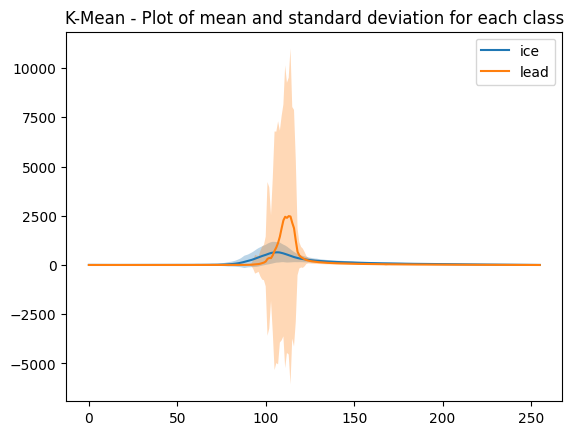

In [16]:
# mean and standard deviation for all echoes
mean_ice = np.mean(waves_cleaned[clusters_kmeans==0],axis=0)
std_ice = np.std(waves_cleaned[clusters_kmeans==0], axis=0)

plt.plot(mean_ice, label='ice')
plt.fill_between(range(len(mean_ice)), mean_ice - std_ice, mean_ice + std_ice, alpha=0.3)


mean_lead = np.mean(waves_cleaned[clusters_kmeans==1],axis=0)
std_lead = np.std(waves_cleaned[clusters_kmeans==1], axis=0)

plt.plot(mean_lead, label='lead')
plt.fill_between(range(len(mean_lead)), mean_lead - std_lead, mean_lead + std_lead, alpha=0.3)

plt.title('K-Mean - Plot of mean and standard deviation for each class')
plt.legend()
#plt.savefig("/content/drive/MyDrive/GEOL0069_data/Week 4/Unsupervised Learning/Kmean_mean_SD_plot.png", format='png', dpi=300)

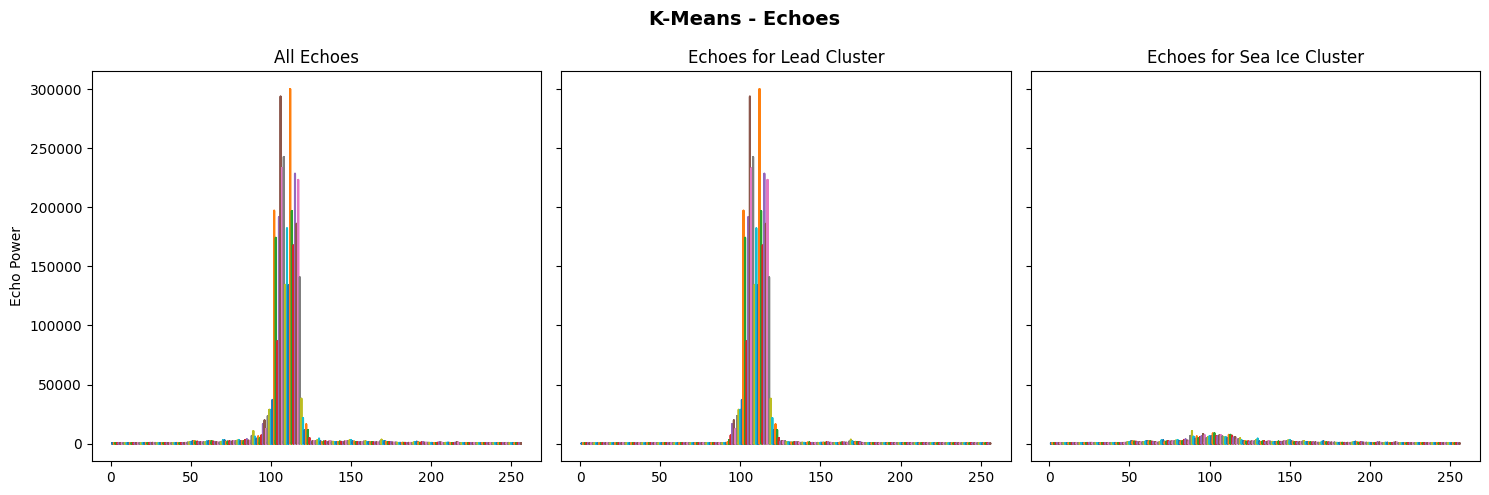

In [17]:
# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the figure title
fig.suptitle("K-Means - Echoes", fontsize=14, fontweight='bold')

# Generate x values
x = np.stack([np.arange(1, waves_cleaned.shape[1] + 1)] * waves_cleaned.shape[0])
x_lead = np.stack([np.arange(1, waves_cleaned[clusters_kmeans == 1].shape[1] + 1)] * waves_cleaned[clusters_kmeans == 1].shape[0])
x_sea_ice = np.stack([np.arange(1, waves_cleaned[clusters_kmeans == 0].shape[1] + 1)] * waves_cleaned[clusters_kmeans == 0].shape[0])

# Plot all echoes
axes[0].plot(x, waves_cleaned)
axes[0].set_title("All Echoes")
axes[0].set_ylabel("Echo Power")

# Plot echoes for the lead cluster
axes[1].plot(x_lead, waves_cleaned[clusters_kmeans == 1])
axes[1].set_title("Echoes for Lead Cluster")

# Plot echoes for the sea ice cluster
axes[2].plot(x_sea_ice, waves_cleaned[clusters_kmeans == 0])
axes[2].set_title("Echoes for Sea Ice Cluster")

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
#plt.savefig("/content/drive/MyDrive/GEOL0069_data/Week 4/Unsupervised Learning/Kmean_plot.png", format='png', dpi=300)
plt.show()


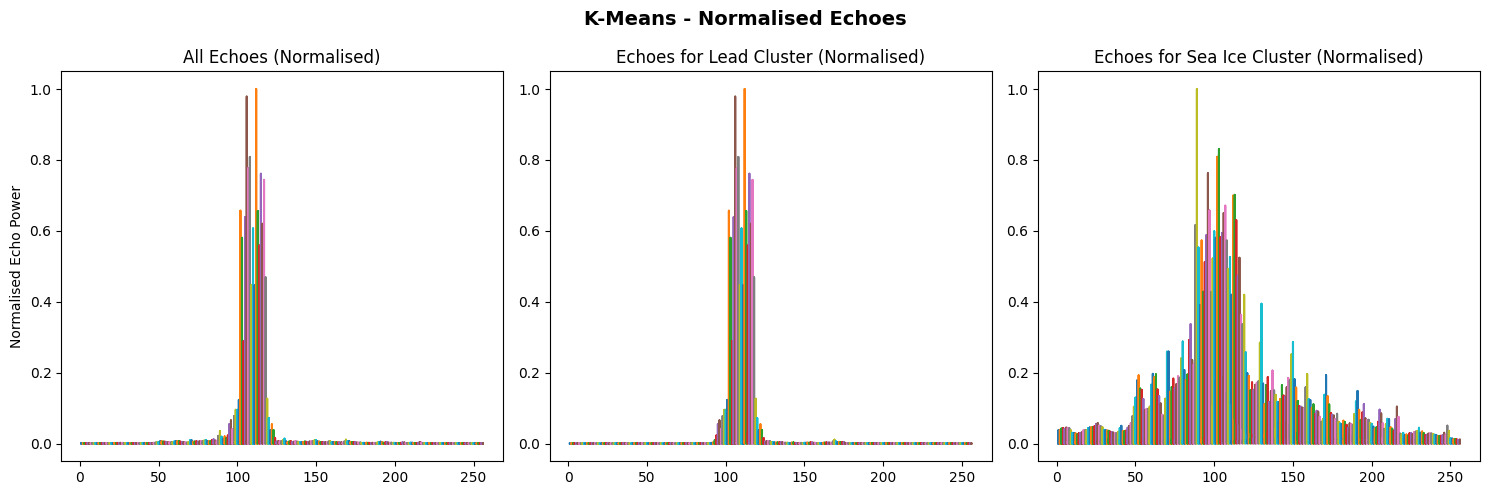

In [18]:
# Normalize function
def normalize(data):
    return data / np.max(data) if np.max(data) != 0 else data  # Avoid division by zero

# Normalize each dataset separately
waves_cleaned_norm = normalize(waves_cleaned)
waves_lead_norm = normalize(waves_cleaned[clusters_kmeans == 1])
waves_sea_ice_norm = normalize(waves_cleaned[clusters_kmeans == 0])

# Generate x values
x = np.stack([np.arange(1, waves_cleaned.shape[1] + 1)] * waves_cleaned.shape[0])
x_lead = np.stack([np.arange(1, waves_lead_norm.shape[1] + 1)] * waves_lead_norm.shape[0])
x_sea_ice = np.stack([np.arange(1, waves_sea_ice_norm.shape[1] + 1)] * waves_sea_ice_norm.shape[0])

# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Set the figure title
fig.suptitle("K-Means - Normalised Echoes", fontsize=14, fontweight='bold')

# Plot all normalized echoes (normalized within this dataset)
axes[0].plot(x, waves_cleaned_norm)
axes[0].set_title("All Echoes (Normalised)")
axes[0].set_ylabel("Normalised Echo Power")

# Plot normalized echoes for the lead cluster (normalized within this subset)
axes[1].plot(x_lead, waves_lead_norm)
axes[1].set_title("Echoes for Lead Cluster (Normalised)")

# Plot normalized echoes for the sea ice cluster (normalized within this subset)
axes[2].plot(x_sea_ice, waves_sea_ice_norm)
axes[2].set_title("Echoes for Sea Ice Cluster (Normalised)")

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
#plt.savefig("/content/drive/MyDrive/GEOL0069_data/Week 4/Unsupervised Learning/kmean_Normalised_plot.png", format='png', dpi=300)
plt.show()

## Scatter Plots of Clustered Data

This code visualizes the clustering results using scatter plots, where different colors represent different clusters (`clusters_gmm`).

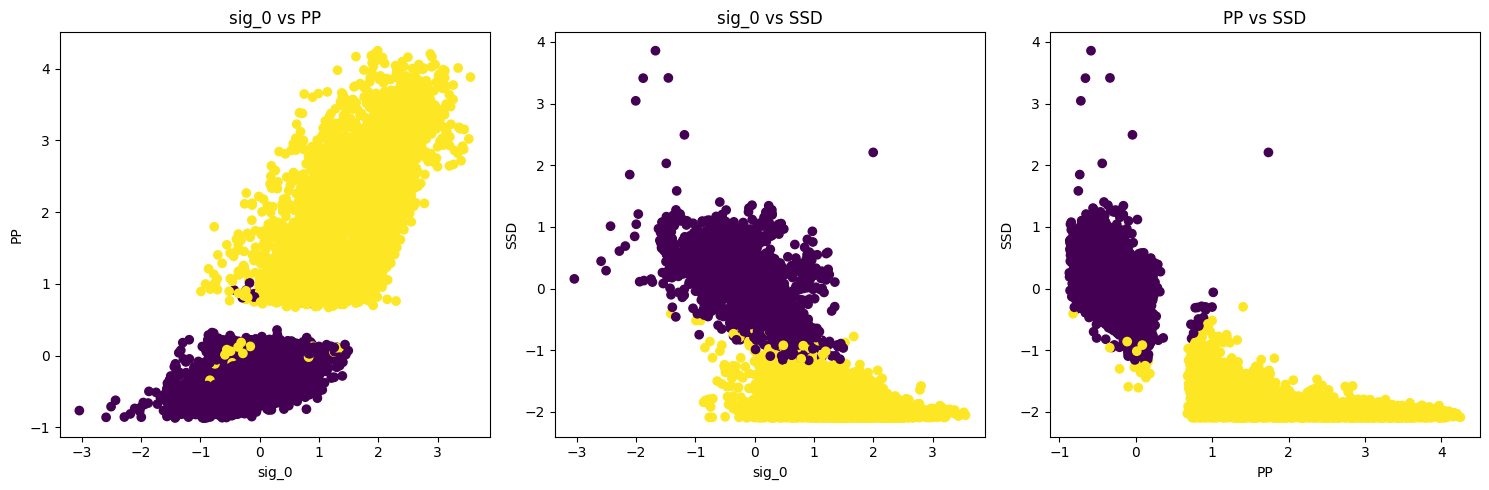

In [20]:
# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)

# First scatter plot: sig_0 vs PP
axes[0].scatter(data_cleaned[:, 0], data_cleaned[:, 1], c=clusters_gmm)
axes[0].set_xlabel("sig_0")
axes[0].set_ylabel("PP")
axes[0].set_title("sig_0 vs PP")

# Second scatter plot: sig_0 vs SSD
axes[1].scatter(data_cleaned[:, 0], data_cleaned[:, 2], c=clusters_gmm)
axes[1].set_xlabel("sig_0")
axes[1].set_ylabel("SSD")
axes[1].set_title("sig_0 vs SSD")

# Third scatter plot: PP vs SSD
axes[2].scatter(data_cleaned[:, 1], data_cleaned[:, 2], c=clusters_gmm)
axes[2].set_xlabel("PP")
axes[2].set_ylabel("SSD")
axes[2].set_title("PP vs SSD")

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()


## Waveform Alignment Using Cross-Correlation

This code aligns waveforms in the cluster where `clusters_gmm == 0` by using cross-correlation.



Text(0.5, 1.0, 'Plot of 10 equally spaced functions where clusters_gmm = 0 (aligned)')

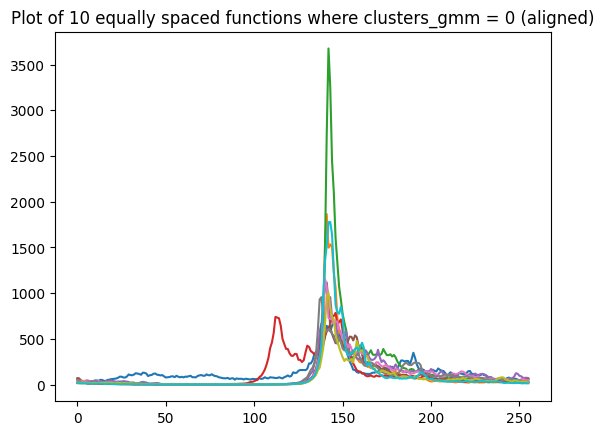

In [21]:
from scipy.signal import correlate

# Find the reference point (e.g., the peak)
reference_point_index = np.argmax(np.mean(waves_cleaned[clusters_gmm==0], axis=0))

# Calculate cross-correlation with the reference point
aligned_waves = []
for wave in waves_cleaned[clusters_gmm==0][::len(waves_cleaned[clusters_gmm == 0]) // 10]:
    correlation = correlate(wave, waves_cleaned[clusters_gmm==0][0])
    shift = len(wave) - np.argmax(correlation)
    aligned_wave = np.roll(wave, shift)
    aligned_waves.append(aligned_wave)

# Plot aligned waves
for aligned_wave in aligned_waves:
    plt.plot(aligned_wave)

plt.title('Plot of 10 equally spaced functions where clusters_gmm = 0 (aligned)')

## Compare with ESA data
In the ESA dataset, sea ice = 1 and lead = 2. Therefore, we need to subtract 1 from it so our predicted labels are comparable with the official product labels.

In [7]:
flag_cleaned_modified = flag_cleaned - 1

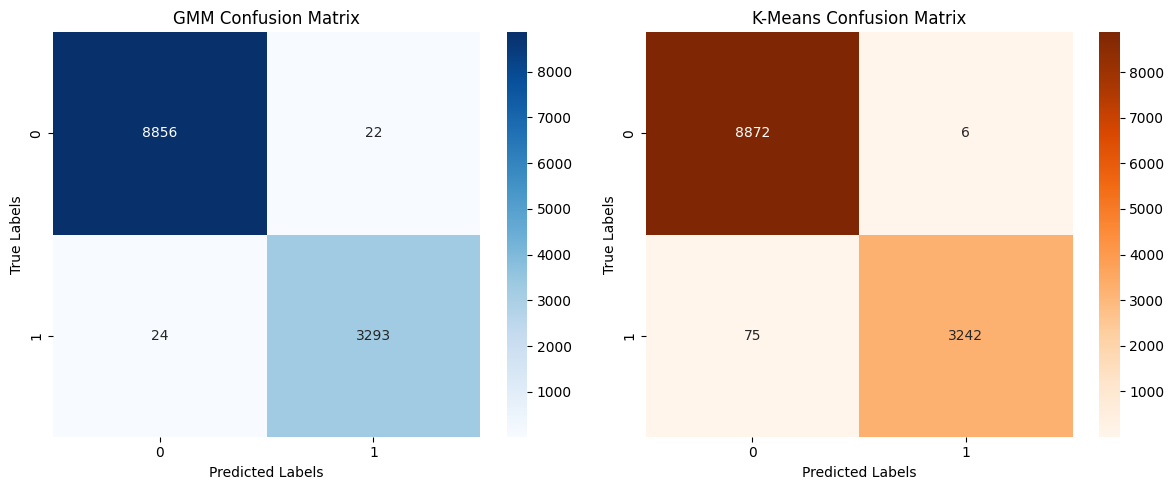

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

true_labels = flag_cleaned_modified   # true labels from the ESA dataset

# Compute confusion matrices for GMM and K-means
conf_matrix_gmm = confusion_matrix(true_labels, clusters_gmm)
conf_matrix_kmeans = confusion_matrix(true_labels, clusters_kmeans)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot GMM confusion matrix
sns.heatmap(conf_matrix_gmm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("GMM Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Plot K-means confusion matrix
sns.heatmap(conf_matrix_kmeans, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("K-Means Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

# Adjust layout
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/GEOL0069_data/Week 4/Unsupervised Learning/Confusion_matrix.png", format='png', dpi=300)
plt.show()
